# Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Read cleaned data

In [2]:
df = pd.read_csv('secom_clean.csv')
X, y = df.drop('target', axis=1), df['target']

# Hybrid Resampling

In [3]:
print("Applying SMOTE-Tomek Hybrid Resampling...")
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

Applying SMOTE-Tomek Hybrid Resampling...


# Logistic Regression

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res)
model = LogisticRegression(solver='liblinear', max_iter=2000, C=0.5)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,2000
,multi_class,'deprecated'


# Confusion Matrix

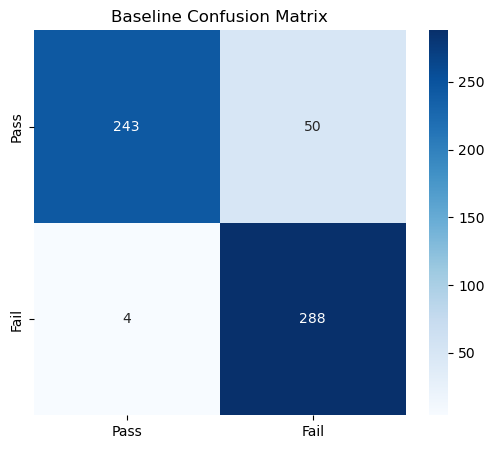

In [5]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pass', 'Fail'], yticklabels=['Pass', 'Fail'])
plt.title("Baseline Confusion Matrix")
plt.show()

# ROC Curve

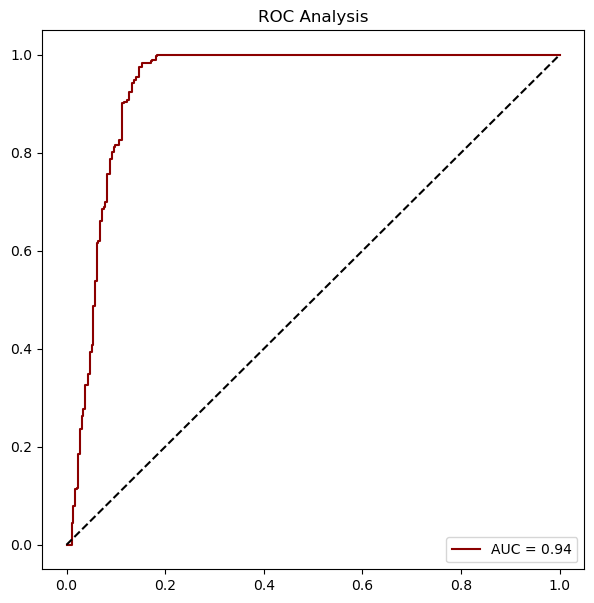

In [6]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='darkred', label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Analysis")
plt.legend()
plt.show()